In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import os
import sys
import pickle
from glob import glob
import itertools 
sns.set(style='ticks', context='notebook', font_scale=1.2)

In [2]:

#---------------------------------------
# LOAD DATASET AND SET RANK INFORMATION
#---------------------------------------

lookup = pd.read_csv('../reference-and-data/lookup_table.csv')
print(lookup.shape)

# select only the feasible syntheses and rank them
lookup_feas = lookup[lookup.synthesis_success==1]
print(lookup_feas.shape)
lookup_feas.head()
lookup_feas = lookup_feas.sort_values(by='abl1_pIC50', ascending=False)
lookup_feas['rank'] = np.arange(lookup_feas.shape[0])+1
lookup_feas.head()

(270, 10)
(213, 10)


,template_name,alkyne_name,template_smi,alkyne_smi,molecule_smi,synthesis_success,synthesis_success_prob,is_experiment_x,abl1_pIC50,abl1_pIC50_std,rank
4,8-1,22-5,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.0,1,9.69897,1.0,1
248,19,22-6,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cnc2cnccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cnc5cnccn45)n(C...,1,1.0,1,9.39794,1.0,2
140,16-1,22-6,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2cnccn12,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.0,1,9.00000,1.0,3
167,16-2,22-6,Cc1ccc(NC(=O)c2ccc(CN3CCN(CCO)CC3)c(C(F)(F)F)c...,C#Cc1cnc2cnccn12,Cc1ccc(NC(=O)c2ccc(CN3CCN(CCO)CC3)c(C(F)(F)F)c...,1,1.0,1,8.69897,1.0,4
247,19,22-5,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cncc2nccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cncc5nccn45)n(C...,1,1.0,1,8.69897,1.0,5



## Load results


In [3]:
#--------
# RANDOM
#--------

# random
with open('random/results.pkl', 'rb') as content:
    data_random = pickle.load(content)

    
#---------
# GRYFFIN
#---------

# # naive
# with open('__GRYFFIN_/naive_gryffin-naive-0/results.pkl', 'rb') as content:
#     data_naive_naive_0 = pickle.load(content)
# with open('__GRYFFIN_/naive_gryffin-fia-1000/results.pkl', 'rb') as content:
#     data_naive_fia_1000 = pickle.load(content)
    
# with open('__GRYFFIN_/static_gryffin-naive-0/results.pkl', 'rb') as content:
#     data_static_naive_0 = pickle.load(content)
# with open('__GRYFFIN_/static_gryffin-fia-1000/results.pkl', 'rb') as content:
#     data_static_fia_1000 = pickle.load(content)
    
# with open('__GRYFFIN_/dynamic_gryffin-naive-0/results.pkl', 'rb') as content:
#     data_dynamic_naive_0 = pickle.load(content)
# with open('__GRYFFIN_/dynamic_gryffin-fia-1000/results.pkl', 'rb') as content:
#     data_dynamic_fia_1000 = pickle.load(content)
    
    
# # fwa
# with open('__GRYFFIN_/naive_gryffin-fwa-0/results.pkl', 'rb') as content:
#     data_naive_fwa_0 = pickle.load(content)

# with open('__GRYFFIN_/static_gryffin-fwa-0/results.pkl', 'rb') as content:
#     data_static_fwa_0 = pickle.load(content)
    
# with open('__GRYFFIN_/dynamic_gryffin-fwa-0/results.pkl', 'rb') as content:
#     data_dynamic_fwa_0 = pickle.load(content)
    
    
# # fca
# with open('__GRYFFIN_/naive_gryffin-fca-0.2/results.pkl', 'rb') as content:
#     data_naive_fca_02 = pickle.load(content)
# with open('__GRYFFIN_/naive_gryffin-fca-0.5/results.pkl', 'rb') as content:
#     data_naive_fca_05 = pickle.load(content)
# with open('__GRYFFIN_/naive_gryffin-fca-0.8/results.pkl', 'rb') as content:
#     data_naive_fca_08 = pickle.load(content)
    
# with open('__GRYFFIN_/static_gryffin-fca-0.2/results.pkl', 'rb') as content:
#     data_static_fca_02 = pickle.load(content)
# with open('__GRYFFIN_/static_gryffin-fca-0.5/results.pkl', 'rb') as content:
#     data_static_fca_05 = pickle.load(content)
# with open('__GRYFFIN_/static_gryffin-fca-0.8/results.pkl', 'rb') as content:
#     data_static_fca_08 = pickle.load(content)
    
# with open('__GRYFFIN_/dynamic_gryffin-fca-0.2/results.pkl', 'rb') as content:
#     data_dynamic_fca_02 = pickle.load(content)
# with open('__GRYFFIN_/dynamic_gryffin-fca-0.5/results.pkl', 'rb') as content:
#     data_dynamic_fca_05 = pickle.load(content)
# with open('__GRYFFIN_/dynamic_gryffin-fca-0.8/results.pkl', 'rb') as content:
#     data_dynamic_fca_08 = pickle.load(content)
    
# # fia
# with open('__GRYFFIN_/naive_gryffin-fia-0.5/results.pkl', 'rb') as content:
#     data_naive_fia_05 = pickle.load(content)
# with open('__GRYFFIN_/naive_gryffin-fia-1/results.pkl', 'rb') as content:
#     data_naive_fia_1 = pickle.load(content)
# with open('__GRYFFIN_/naive_gryffin-fia-2/results.pkl', 'rb') as content:
#     data_naive_fia_2 = pickle.load(content)
    
# with open('__GRYFFIN_/static_gryffin-fia-0.5/results.pkl', 'rb') as content:
#     data_static_fia_05 = pickle.load(content)
# with open('__GRYFFIN_/static_gryffin-fia-1/results.pkl', 'rb') as content:
#     data_static_fia_1 = pickle.load(content)
# with open('__GRYFFIN_/static_gryffin-fia-2/results.pkl', 'rb') as content:
#     data_static_fia_2 = pickle.load(content)
    
# with open('__GRYFFIN_/dynamic_gryffin-fia-0.5/results.pkl', 'rb') as content:
#     data_dynamic_fia_05 = pickle.load(content)
# with open('__GRYFFIN_/dynamic_gryffin-fia-1/results.pkl', 'rb') as content:
#     data_dynamic_fia_1 = pickle.load(content)
# with open('__GRYFFIN_/dynamic_gryffin-fia-2/results.pkl', 'rb') as content:
#     data_dynamic_fia_2 = pickle.load(content)
    

#---------------
# BOTORCH - UCB
#---------------

# naive
with open('ucb/wodesc_botorch-naive-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_naive_0 = pickle.load(content)
with open('ucb/wodesc_botorch-naive-replace/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_naive_replace = pickle.load(content)
with open('ucb/wodesc_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fia_1000 = pickle.load(content)
    
with open('ucb/desc_mord_botorch-naive-0/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_naive_0 = pickle.load(content)
with open('ucb/desc_mord_botorch-naive-replace/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_naive_replace = pickle.load(content)
with open('ucb/desc_mord_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fia_1000 = pickle.load(content)
    
# fwa
with open('ucb/wodesc_botorch-fwa-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fwa_0 = pickle.load(content)

with open('ucb/desc_mord_botorch-fwa-0/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fwa_0 = pickle.load(content)
       
# fca
with open('ucb/wodesc_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fca_02 = pickle.load(content)
with open('ucb/wodesc_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fca_05 = pickle.load(content)
with open('ucb/wodesc_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fca_08 = pickle.load(content)
    
    
with open('ucb/desc_mord_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fca_02 = pickle.load(content)
with open('ucb/desc_mord_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fca_05 = pickle.load(content)
with open('ucb/desc_mord_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fca_08 = pickle.load(content)
    
# fia
with open('ucb/wodesc_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fia_05 = pickle.load(content)
with open('ucb/wodesc_botorch-fia-1/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fia_1 = pickle.load(content)
with open('ucb/wodesc_botorch-fia-2/results.pkl', 'rb') as content:
    data_wodesc_botorch_ucb_fia_2 = pickle.load(content)
    
with open('ucb/desc_mord_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fia_05 = pickle.load(content)
with open('ucb/desc_mord_botorch-fia-1/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fia_1 = pickle.load(content)
with open('ucb/desc_mord_botorch-fia-2/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ucb_fia_2 = pickle.load(content)
    

#--------------
# BOTORCH - EI
#--------------

# naive
with open('ei/wodesc_botorch-naive-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_naive_0 = pickle.load(content)
with open('ei/wodesc_botorch-naive-replace/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_naive_replace = pickle.load(content)
with open('ei/wodesc_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fia_1000 = pickle.load(content)
    
with open('ei/desc_mord_botorch-naive-0/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_naive_0 = pickle.load(content)
with open('ei/desc_mord_botorch-naive-replace/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_naive_replace = pickle.load(content)
with open('ei/desc_mord_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fia_1000 = pickle.load(content)
    
# fwa
with open('ei/wodesc_botorch-fwa-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fwa_0 = pickle.load(content)

with open('ei/desc_mord_botorch-fwa-0/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fwa_0 = pickle.load(content)
       
# fca
with open('ei/wodesc_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fca_02 = pickle.load(content)
with open('ei/wodesc_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fca_05 = pickle.load(content)
with open('ei/wodesc_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fca_08 = pickle.load(content)
    
    
with open('ei/desc_mord_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fca_02 = pickle.load(content)
with open('ei/desc_mord_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fca_05 = pickle.load(content)
with open('ei/desc_mord_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fca_08 = pickle.load(content)
    
# fia
with open('ei/wodesc_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fia_05 = pickle.load(content)
with open('ei/wodesc_botorch-fia-1/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fia_1 = pickle.load(content)
with open('ei/wodesc_botorch-fia-2/results.pkl', 'rb') as content:
    data_wodesc_botorch_ei_fia_2 = pickle.load(content)
    
with open('ei/desc_mord_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fia_05 = pickle.load(content)
with open('ei/desc_mord_botorch-fia-1/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fia_1 = pickle.load(content)
with open('ei/desc_mord_botorch-fia-2/results.pkl', 'rb') as content:
    data_desc_mord_botorch_ei_fia_2 = pickle.load(content)
        
    
# 0 --> without descriptors
# 0 --> with descriptors

all_data = [
    # random
    {'method': 'random', 'planner': 'random', 'params': 'random', 'desc': False, 'acqf': 'n/a', 'data': data_random},
    # gryffin
    # naive
#     {'method': 'naive_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_naive_0},
#     {'method': 'naive_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fia_1000},
#     {'method': 'naive_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fwa_0},
#     {'method': 'naive_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fca_02},
#     {'method': 'naive_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fca_05},
#     {'method': 'naive_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fca_08},
#     {'method': 'naive_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fia_05},
#     {'method': 'naive_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fia_1},
#     {'method': 'naive_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'naive', 'acqf': 'gryffin', 'data': data_naive_fia_2},
#     # static
#     {'method': 'static_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_naive_0},
#     {'method': 'static_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fia_1000},
#     {'method': 'static_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fwa_0},
#     {'method': 'static_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fca_02},
#     {'method': 'static_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fca_05},
#     {'method': 'static_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fca_08},
#     {'method': 'static_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fia_05},
#     {'method': 'static_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fia_1},
#     {'method': 'static_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'static', 'acqf': 'gryffin', 'data': data_static_fia_2},
#     # dynamic
#     {'method': 'dynamic_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_naive_0},
#     {'method': 'dynamic_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fia_1000},
#     {'method': 'dynamic_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fwa_0},
#     {'method': 'dynamic_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fca_02},
#     {'method': 'dynamic_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fca_05},
#     {'method': 'dynamic_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fca_08},
#     {'method': 'dynamic_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fia_05},
#     {'method': 'dynamic_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fia_1},
#     {'method': 'dynamic_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'dynamic', 'acqf': 'gryffin', 'data': data_dynamic_fia_2},
    # botorch - ucb
    # wodesc
     {'method': 'wodesc-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_naive_0},
     {'method': 'wodesc-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_naive_replace},
     {'method': 'wodesc-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fia_1000},
     {'method': 'wodesc-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fwa_0},
     {'method': 'wodesc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fca_02},
     {'method': 'wodesc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fca_02},
     {'method': 'wodesc-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fca_05},
     {'method': 'wodesc-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fca_08},
     {'method': 'wodesc-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fia_05},
     {'method': 'wodesc-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fia_1},
     {'method': 'wodesc-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'wodesc', 'acqf': 'ucb', 'data': data_wodesc_botorch_ucb_fia_2},
    # desc mord
    {'method': 'desc-mord-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_naive_0},
    {'method': 'desc-mord-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_naive_replace},
    {'method': 'desc-mord-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fia_1000},
    {'method': 'desc-mord-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fwa_0},
    {'method': 'desc-mord-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fca_02},
    {'method': 'desc-mord-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fca_05},
    {'method': 'desc-mord-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fca_08},
    {'method': 'desc-mord-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fia_05},
    {'method': 'desc-mord-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fia_1},
    {'method': 'desc-mord-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'desc-mord', 'acqf': 'ucb', 'data': data_desc_mord_botorch_ucb_fia_2},
    # botorch - ei
    # wodesc
     {'method': 'wodesc-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_naive_0},
     {'method': 'wodesc-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_naive_replace},
     {'method': 'wodesc-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fia_1000},
     {'method': 'wodesc-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fwa_0},
     {'method': 'wodesc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fca_02},
     {'method': 'wodesc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fca_02},
     {'method': 'wodesc-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fca_05},
     {'method': 'wodesc-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fca_08},
     {'method': 'wodesc-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fia_05},
     {'method': 'wodesc-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fia_1},
     {'method': 'wodesc-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'wodesc', 'acqf': 'ei', 'data': data_wodesc_botorch_ucb_fia_2},
    # desc mord
    {'method': 'desc-mord-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_naive_0},
    {'method': 'desc-mord-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_naive_replace},
    {'method': 'desc-mord-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fia_1000},
    {'method': 'desc-mord-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fwa_0},
    {'method': 'desc-mord-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fca_02},
    {'method': 'desc-mord-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fca_05},
    {'method': 'desc-mord-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fca_08},
    {'method': 'desc-mord-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fia_05},
    {'method': 'desc-mord-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fia_1},
    {'method': 'desc-mord-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'desc-mord', 'acqf': 'ei', 'data': data_desc_mord_botorch_ei_fia_2}
]
    
# print out the number of repeated runs for each strategy
    
print('NUM RANDOM : ', len(data_random))

print('-'*30)

# print('NUM NAIVE-NAIVE-0 : ', len(data_naive_naive_0))
# print('NUM NAIVE-FIA-1000 : ', len(data_naive_fia_1000))

# print('NUM NAIVE-FWA-0 : ', len(data_naive_fwa_0))

# print('NUM NAIVE-FCA-02 : ', len(data_naive_fca_02))
# print('NUM NAIVE-FCA-05 : ', len(data_naive_fca_05))
# print('NUM NAIVE-FCA-08 : ', len(data_naive_fca_08))

# print('NUM NAIVE-FIA-05 : ', len(data_naive_fia_05))
# print('NUM NAIVE-FIA-1 : ', len(data_naive_fia_1))
# print('NUM NAIVE-FIA-2 : ', len(data_naive_fia_2))

# print('NUM STATIC-NAIVE-0 : ', len(data_naive_naive_0))
# print('NUM STATIC-FIA-1000 : ', len(data_naive_fia_1000))

# print('NUM STATIC-FWA-0 : ', len(data_naive_fwa_0))

# print('NUM STATIC-FCA-02 : ', len(data_naive_fca_02))
# print('NUM STATIC-FCA-05 : ', len(data_naive_fca_05))
# print('NUM STATIC-FCA-08 : ', len(data_naive_fca_08))

# print('NUM STATIC-FIA-05 : ', len(data_naive_fia_05))
# print('NUM STATIC-FIA-1 : ', len(data_naive_fia_1))
# print('NUM STATIC-FIA-2 : ', len(data_naive_fia_2))


# print('NUM DYNAMIC-NAIVE-0 : ', len(data_dynamic_naive_0))
# print('NUM DYNAMIC-FIA-1000 : ', len(data_dynamic_fia_1000))

# print('NUM DYNAMIC-FWA-0 : ', len(data_dynamic_fwa_0))

# print('NUM DYNAMIC-FCA-02 : ', len(data_dynamic_fca_02))
# print('NUM DYNAMIC-FCA-05 : ', len(data_dynamic_fca_05))
# print('NUM DYNAMIC-FCA-08 : ', len(data_dynamic_fca_08))

# print('NUM DYNAMIC-FIA-05 : ', len(data_dynamic_fia_05))
# print('NUM DYNAMIC-FIA-1 : ', len(data_dynamic_fia_1))
# print('NUM DYNAMIC-FIA-2 : ', len(data_dynamic_fia_2))

print('\n')
print('-'*30)
print('*** BOTORCH UCB ***\n')

print('NUM WODESC-BOTORCH-NAIVE-0 : ', len(data_wodesc_botorch_ucb_naive_0))
print('NUM WODESC-BOTORCH-NAIVE-REPLACE : ', len(data_wodesc_botorch_ucb_naive_replace))
print('NUM WODESC-BOTORCH-FIA-1000 : ', len(data_wodesc_botorch_ucb_fia_1000))

print('NUM WODESC-BOTORCH-FWA-0 : ', len(data_wodesc_botorch_ucb_fwa_0))

print('NUM WODESC-BOTORCH-FCA-02 : ', len(data_wodesc_botorch_ucb_fca_02))
print('NUM WODESC-BOTORCH-FCA-05 : ', len(data_wodesc_botorch_ucb_fca_05))
print('NUM WODESC-BOTORCH-FCA-08 : ', len(data_wodesc_botorch_ucb_fca_08))

print('NUM WODESC-BOTORCH-FIA-05 : ', len(data_wodesc_botorch_ucb_fia_05))
print('NUM WODESC-BOTORCH-FIA-1 : ', len(data_wodesc_botorch_ucb_fia_1))
print('NUM WODESC-BOTORCH-FIA-2 : ', len(data_wodesc_botorch_ucb_fia_2))


print('NUM DESC-MORD-BOTORCH-NAIVE-0 : ', len(data_desc_mord_botorch_ucb_naive_0))
print('NUM DESC-MORD-BOTORCH-NAIVE-REPLACE : ', len(data_desc_mord_botorch_ucb_naive_replace))
print('NUM DESC-MORD-BOTORCH-FIA-1000 : ', len(data_desc_mord_botorch_ucb_fia_1000))

print('NUM DESC-MORD-BOTORCH-FWA-0 : ', len(data_desc_mord_botorch_ucb_fwa_0))

print('NUM DESC-MORD-BOTORCH-FCA-02 : ', len(data_desc_mord_botorch_ucb_fca_02))
print('NUM DESC-MORD-BOTORCH-FCA-05 : ', len(data_desc_mord_botorch_ucb_fca_05))
print('NUM DESC-MORD-BOTORCH-FCA-08 : ', len(data_desc_mord_botorch_ucb_fca_08))

print('NUM DESC-MORD-BOTORCH-FIA-05 : ', len(data_desc_mord_botorch_ucb_fia_05))
print('NUM DESC-MORD-BOTORCH-FIA-1 : ', len(data_desc_mord_botorch_ucb_fia_1))
print('NUM DESC-MORD-BOTORCH-FIA-2 : ', len(data_desc_mord_botorch_ucb_fia_2))


print('\n')
print('-'*30)
print('*** BOTORCH EI ***\n')

print('NUM WODESC-BOTORCH-NAIVE-0 : ', len(data_wodesc_botorch_ei_naive_0))
print('NUM WODESC-BOTORCH-NAIVE-REPLACE : ', len(data_wodesc_botorch_ei_naive_replace))
print('NUM WODESC-BOTORCH-FIA-1000 : ', len(data_wodesc_botorch_ei_fia_1000))

print('NUM WODESC-BOTORCH-FWA-0 : ', len(data_wodesc_botorch_ei_fwa_0))

print('NUM WODESC-BOTORCH-FCA-02 : ', len(data_wodesc_botorch_ei_fca_02))
print('NUM WODESC-BOTORCH-FCA-05 : ', len(data_wodesc_botorch_ei_fca_05))
print('NUM WODESC-BOTORCH-FCA-08 : ', len(data_wodesc_botorch_ei_fca_08))

print('NUM WODESC-BOTORCH-FIA-05 : ', len(data_wodesc_botorch_ei_fia_05))
print('NUM WODESC-BOTORCH-FIA-1 : ', len(data_wodesc_botorch_ei_fia_1))
print('NUM WODESC-BOTORCH-FIA-2 : ', len(data_wodesc_botorch_ei_fia_2))


print('NUM DESC-MORD-BOTORCH-NAIVE-0 : ', len(data_desc_mord_botorch_ei_naive_0))
print('NUM DESC-MORD-BOTORCH-NAIVE-REPLACE : ', len(data_desc_mord_botorch_ei_naive_replace))
print('NUM DESC-MORD-BOTORCH-FIA-1000 : ', len(data_desc_mord_botorch_ei_fia_1000))

print('NUM DESC-MORD-BOTORCH-FWA-0 : ', len(data_desc_mord_botorch_ei_fwa_0))

print('NUM DESC-MORD-BOTORCH-FCA-02 : ', len(data_desc_mord_botorch_ei_fca_02))
print('NUM DESC-MORD-BOTORCH-FCA-05 : ', len(data_desc_mord_botorch_ei_fca_05))
print('NUM DESC-MORD-BOTORCH-FCA-08 : ', len(data_desc_mord_botorch_ei_fca_08))

print('NUM DESC-MORD-BOTORCH-FIA-05 : ', len(data_desc_mord_botorch_ei_fia_05))
print('NUM DESC-MORD-BOTORCH-FIA-1 : ', len(data_desc_mord_botorch_ei_fia_1))
print('NUM DESC-MORD-BOTORCH-FIA-2 : ', len(data_desc_mord_botorch_ei_fia_2))

NUM RANDOM :  200
------------------------------


------------------------------
*** BOTORCH UCB ***

NUM WODESC-BOTORCH-NAIVE-0 :  50
NUM WODESC-BOTORCH-NAIVE-REPLACE :  50
NUM WODESC-BOTORCH-FIA-1000 :  50
NUM WODESC-BOTORCH-FWA-0 :  50
NUM WODESC-BOTORCH-FCA-02 :  50
NUM WODESC-BOTORCH-FCA-05 :  50
NUM WODESC-BOTORCH-FCA-08 :  50
NUM WODESC-BOTORCH-FIA-05 :  50
NUM WODESC-BOTORCH-FIA-1 :  50
NUM WODESC-BOTORCH-FIA-2 :  50
NUM DESC-MORD-BOTORCH-NAIVE-0 :  50
NUM DESC-MORD-BOTORCH-NAIVE-REPLACE :  50
NUM DESC-MORD-BOTORCH-FIA-1000 :  50
NUM DESC-MORD-BOTORCH-FWA-0 :  50
NUM DESC-MORD-BOTORCH-FCA-02 :  50
NUM DESC-MORD-BOTORCH-FCA-05 :  50
NUM DESC-MORD-BOTORCH-FCA-08 :  50
NUM DESC-MORD-BOTORCH-FIA-05 :  50
NUM DESC-MORD-BOTORCH-FIA-1 :  50
NUM DESC-MORD-BOTORCH-FIA-2 :  50


------------------------------
*** BOTORCH EI ***

NUM WODESC-BOTORCH-NAIVE-0 :  100
NUM WODESC-BOTORCH-NAIVE-REPLACE :  100
NUM WODESC-BOTORCH-FIA-1000 :  100
NUM WODESC-BOTORCH-FWA-0 :  100
NUM WODESC-BOTORCH-

In [4]:
#-------------
# SET PALETTE
#-------------
mypalette = {
        'random': ['gray'],
        'naive':['#c7f9cc', '#57cc99'], #'#2d6a4f'], 
        'fwa':['#ff9b85'], 
        'fca':['#fbe9b1', '#f4cb48', '#ae870a'], 
        'fia':['#caf0f8', '#00b4d8', '#0077b6'],
}

In [14]:
# def get_traces_min(data, replace_nan=True):
#     traces_min = []
#     for df in data:
#         trace = df.loc[:, 'obj'].to_numpy()
#         # if first is nan, replace with first non-nan
#         if replace_nan is True:
#             if np.isnan(trace[0]):
#                 for val in trace[1:]:
#                     if not np.isnan(val):
#                         trace[0] = val
#                         break
#         trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
#         traces_min.append(trace_min)
#     return np.array(traces_min)


# def get_traces_min_for_categorical(data, replace_nan=True):
#     traces_min = []
#     for df in data:
#         trace = np.zeros(100)  # up to 100
#         results = df.loc[:, 'obj'].to_numpy()[:100]  # up to 100
#         trace[:len(results)] = results
        
#         # if first is nan, replace with first non-nan
#         if replace_nan is True:
#             if np.isnan(trace[0]):
#                 for val in trace[1:]:
#                     if not np.isnan(val):
#                         trace[0] = val
#                         break
#         trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
#         traces_min.append(trace_min)
#     return np.array(traces_min)

def get_traces_max_for_categorical(data, replace_nan=True, up_to=100):
    traces_max = []
    for df in data:
        trace = np.zeros(up_to) 
        results = df.loc[:, 'abl1_pIC50'].to_numpy()[:up_to] 
        trace[:len(results)] = results
        
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
        trace_max = [np.nanmax(trace[:i+1]) for i in range(len(trace))]
        traces_max.append(trace_max)
    return np.array(traces_max)


def get_rank_traces_for_categorical(data, replace_nan=True, up_to=100):
    
    traces_min = []
    for df in data:
        trace = []
        template_names = df.loc[:, 'template_name'].tolist()[:up_to]
        alkyne_names = df.loc[:, 'alkyne_name'].tolist()[:up_to]
        #results  = df.loc[:, 'abl1_pIC50'].to_numpy()[:up_to]
        
        # get the corresponsing ranks
        for temp_name, alky_name in zip(template_names, alkyne_names):
            match = lookup_feas.loc[
                (lookup_feas.template_name==temp_name) &
                (lookup_feas.alkyne_name==alky_name)
            ]
            if len(match)==1:
                # feasible, add rank
                trace.append( match.loc[:, 'rank'].to_numpy()[0] )
            else:
                # not feasible, add nan 
                trace.append(np.nan)
            
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
                        
        trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
        traces_min.append(trace_min)
        
    return np.array(traces_min)


def get_num_eval_top_x(data, top_x=1):
    ''' return number of evalautions needed to acheive at least 
    a top x candidate --> also returns the number of nans measured 
    up until the top_x candidate was found
    ''' 
    num_evals = []
    num_nans = []
    for df in data:
        num_eval = 1
        num_nan = 0
        
        try:
            template_names = df.loc[:, 'template_name'].tolist()
            alkyne_names = df.loc[:, 'alkyne_name'].tolist()
        except Exception as e:
            print('error : ', e)
            template_names = df.loc[:, 'template'].tolist()
            alkyne_names   = df.loc[:, 'alkyne'].tolist()
        
        # get the corresponsing ranks - stop when found top_x
        for temp_name, alky_name in zip(template_names, alkyne_names):
            match = lookup_feas.loc[
                (lookup_feas.template_name==temp_name) &
                (lookup_feas.alkyne_name==alky_name)
            ]
            if len(match)==1:
                # feasible, add rank
                rank = match.loc[:, 'rank'].to_numpy()[0] 
                if rank <= top_x:
                    # done
                    break
                else:
                    num_eval += 1     
            else:
                # infeasible
                num_nan+=1
                
        num_evals.append(num_eval)
        num_nans.append(num_nan)
        
    return num_evals, num_nans



def plot_min_rank_trace_mean(data, up_to, ax=None, color=None, label=None,  stde=False, unc=True, shift=0.0):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_min = get_rank_traces_for_categorical(data, up_to=up_to) - shift
    
    mean = np.nanmean(traces_min, axis=0)
    if stde is True:
        # standard error
        stde = np.nanstd(traces_min, axis=0, ddof=1) / np.sqrt(np.shape(traces_min)[0] - 1)
    else:
        # standard deviation
        stde = np.nanstd(traces_min, axis=0, ddof=1)
        
    x = range(1, np.shape(traces_min)[1]+1, 1)

    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    if unc is True:
        ax.fill_between(x, y1=mean - 1.96*stde, y2=mean + 1.96*stde, alpha=0.2, color=color)
        ax.plot(x, mean - 1.96*stde, color=color, linewidth=1, alpha=0.5)
        ax.plot(x, mean + 1.96*stde, color=color, linewidth=1, alpha=0.5)
        
     

def plot_max_trace_mean(data, up_to, ax=None, color=None, label=None,  stde=False, unc=True, shift=0.0):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_max = get_traces_max_for_categorical(data, up_to=up_to) - shift
#     else:
#         traces_max = get_traces_max(data) - shift
    
    mean = np.nanmean(traces_max, axis=0)
    if stde is True:
        # standard error
        stde = np.nanstd(traces_max, axis=0, ddof=1) / np.sqrt(np.shape(traces_max)[0] - 1)
    else:
        # standard deviation
        stde = np.nanstd(traces_max, axis=0, ddof=1)
        
    x = range(1, np.shape(traces_max)[1]+1, 1)

    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    if unc is True:
        ax.fill_between(x, y1=mean - 1.96*stde, y2=mean + 1.96*stde, alpha=0.2, color=color)
        ax.plot(x, mean - 1.96*stde, color=color, linewidth=1, alpha=0.5)
        ax.plot(x, mean + 1.96*stde, color=color, linewidth=1, alpha=0.5)
        
    
    
def plot_max_trace_median(data, up_to, ax=None, color=None, label=None, nboots=1000):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_max = get_traces_max_for_categorical(data, replace_nan=True, up_to=up_to)

    median = np.median(traces_max, axis=0)
    q100, q75, q25, q0 = bootstrapped_iqr(traces_max, nboots=1000)
    x = range(1, np.shape(traces_max)[1] + 1, 1)

    ax.plot(x, median, color=color, label=label)
    ax.fill_between(x, y1=q25, y2=q75, alpha=0.2, color=color)
    ax.fill_between(x, y1=q0, y2=q100, alpha=0.2, color=color)
    
    
def bootstrapped_iqr(traces, nboots=100):
    boot_medians = []
    for b in range(nboots):
        boot_idx = np.random.randint(low=0, high=traces.shape[0], size=traces.shape[0])
        boot_traces = traces[boot_idx]
        boot_median = np.median(boot_traces, axis=0)
        boot_medians.append(boot_median)
        
    q75, q25 = np.percentile(np.array(boot_medians), [75 ,25], axis=0)
    q100 = np.max(traces, axis=0)
    q0 = np.min(traces, axis=0)
    return q100, q75, q25, q0

    
# def get_cumulative(data):
#     traces_min = get_traces_min(data)
    
#     # if first merit is NaN, replace with next
#     for i, trace in enumerate(traces_min):
#         for j, merit in enumerate(trace):
#             if np.isnan(merit) == True:
#                 found = False
#                 jdelta = 1
#                 # find first non-nan
#                 while found is False:
#                     if np.isnan(traces_min[i, j+jdelta]) == False:
#                         traces_min[i, j] = traces_min[i, j+jdelta]
#                         found = True
#                     else:
#                         jdelta += 1
    
#     sum_min = np.sum(traces_min, axis=1) 
#     mean_min = np.mean(sum_min) 
#     serr_min = np.std(sum_min) / np.sqrt(len(sum_min) - 1)
#     return mean_min, serr_min


def get_cumulative(data):
    traces_max = get_traces_max_for_categorical(data)
    
    # if first merit is NaN, replace with next
    for i, trace in enumerate(traces_max):
        for j, merit in enumerate(trace):
            if np.isnan(merit) == True:
                found = False
                jdelta = 1
                # find first non-nan
                while found is False:
                    if np.isnan(traces_min[i, j+jdelta]) == False:
                        traces_min[i, j] = traces_min[i, j+jdelta]
                        found = True
                    else:
                        jdelta += 1
    
    sum_max = np.sum(traces_max, axis=1) 
    mean_max = np.mean(sum_max)
    med_max = np.median(sum_max)
    serr_max = np.std(sum_max) / np.sqrt(len(sum_max) - 1)
    return mean_max, serr_max



def number_of_nans(data, normalize=False):
    """normalise == True returns fraction of NaN instead of number of NaN"""
    num_nans = []
    for repeat in data:
        num_nans_i = sum(np.isnan(repeat['abl1_pIC50']))
#         if normalize is True:
#             num_nans_i = num_nans_i / len(repeat['abl1_pIC50'])
        num_nans.append(num_nans_i)
    return num_nans

In [15]:
def make_num_evals_df(all_data, top_x=1):
    ''' make data frame of number of evals and number of nans
    '''
    frame = {'method': [], 'planner': [], 'params': [], 'desc': [], 
             'acqf': [], 'num_evals': [], 'num_nans': [], 'num_nans_eff': [],
            'per_explore': [], 'per_nans': [],
        }
    for data in all_data:
        print('method :', data['method'])
        num_evals, num_nans = get_num_eval_top_x(data['data'], top_x=top_x)
        
        feas_ratio = 213/270
        exp_num_nans = np.array(num_evals)*(1-feas_ratio)
        num_nans_eff = np.array(num_nans) - exp_num_nans
        
        assert len(num_evals)==len(num_nans)==len(num_nans_eff)
        
        per_explore = (np.array(num_evals) / 270. ) * 100.
        per_nans = (np.array(num_nans) / np.array(num_evals)) * 100.
        
        frame['method'].extend( [data['method']]*len(num_evals) )
        frame['planner'].extend( [data['planner']]*len(num_evals) )
        frame['params'].extend( [data['params']]*len(num_evals) )
        frame['desc'].extend( [data['desc']]*len(num_evals))
        frame['acqf'].extend( [data['acqf']]*len(num_evals))
        frame['num_evals'].extend(num_evals)
        
        frame['per_explore'].extend(list(per_explore))
        frame['per_nans'].extend(list(per_nans))
        
        frame['num_nans'].extend(num_nans)
        frame['num_nans_eff'].extend(num_nans_eff)

    print(len(frame['method']))
    print(len(frame['desc']))
    print(frame['desc'])
    
    return pd.DataFrame(frame)

In [16]:
df_top_1 = make_num_evals_df(all_data, top_x=1)
print(df_top_1.shape)
df_top_1.head()

method : random
method : wodesc-botorch-naive-0
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
er

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
method : wodesc-botorch-fca-0.8
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
method : desc-mord-botorch-fwa-0
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'templat

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
method : wodesc-botorch-naive-replace
error :  'template_name'
error :  'template_name'
error :  'te

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
method : wodesc-botorch-fia-0.5
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'


error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
method : desc-mord-botorch-fca-0.8
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'templ

error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'
error :  'template_name'


,method,planner,params,desc,acqf,num_evals,num_nans,num_nans_eff,per_explore,per_nans
0,random,random,random,False,n/a,95,33,12.944444,35.185185,34.736842
1,random,random,random,False,n/a,203,56,13.144444,75.185185,27.586207
2,random,random,random,False,n/a,182,49,10.577778,67.407407,26.923077
3,random,random,random,False,n/a,210,56,11.666667,77.777778,26.666667
4,random,random,random,False,n/a,118,32,7.088889,43.703704,27.118644


In [19]:
df_top_1

,method,planner,params,desc,acqf,num_evals,num_nans,num_nans_eff,per_explore,per_nans
0,random,random,random,False,n/a,95,33,12.944444,35.185185,34.736842
1,random,random,random,False,n/a,203,56,13.144444,75.185185,27.586207
2,random,random,random,False,n/a,182,49,10.577778,67.407407,26.923077
3,random,random,random,False,n/a,210,56,11.666667,77.777778,26.666667
4,random,random,random,False,n/a,118,32,7.088889,43.703704,27.118644
...,...,...,...,...,...,...,...,...,...,...
2794,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,13,3,0.255556,4.814815,23.076923
2795,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,13,4,1.255556,4.814815,30.769231
2796,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,64,34,20.488889,23.703704,53.125000
2797,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,33,7,0.033333,12.222222,21.212121


[<matplotlib.patches.Rectangle object at 0x17cf48700>, <matplotlib.patches.Rectangle object at 0x17cf102b0>, <matplotlib.patches.Rectangle object at 0x17cf4bac0>, <matplotlib.patches.Rectangle object at 0x17cf4b940>, <matplotlib.patches.Rectangle object at 0x17cf827a0>]


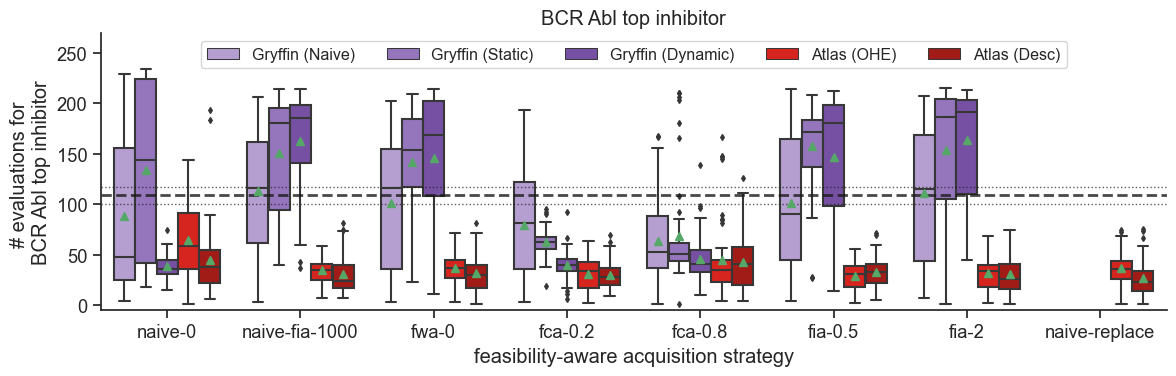

In [9]:
#--------------------------------
# [NUM EVAL] GRYFFIN VS. BOTORCH
#--------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-5, 270)

ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# evaluations for \nBCR Abl top inhibitor')
ax.set_title('BCR Abl top inhibitor')
#ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()
#plt.savefig('abl-kinase-num-evals-boxplot.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x17aeed450>, <matplotlib.patches.Rectangle object at 0x17d350730>, <matplotlib.patches.Rectangle object at 0x17d383190>, <matplotlib.patches.Rectangle object at 0x17d383010>, <matplotlib.patches.Rectangle object at 0x17d3a9e70>]


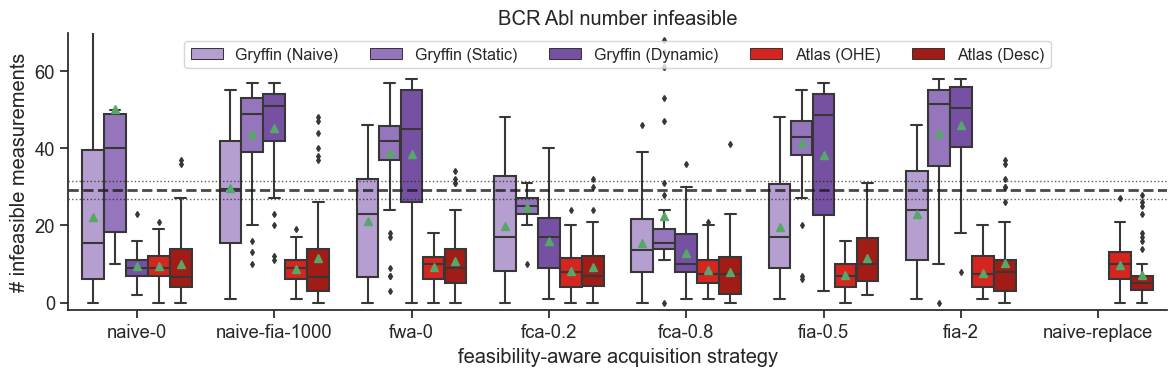

In [10]:
#--------------------------------
# [NUM NANS] GRYFFIN VS. BOTORCH
#--------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-2, 70)

ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# infeasible measurements')
ax.set_title('BCR Abl number infeasible')
#ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()
#plt.savefig('abl-kinase-num-nans-boxplot.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x17e7e6e90>, <matplotlib.patches.Rectangle object at 0x17e79f850>, <matplotlib.patches.Rectangle object at 0x17e816b00>, <matplotlib.patches.Rectangle object at 0x17e83db70>, <matplotlib.patches.Rectangle object at 0x17e83f1c0>]


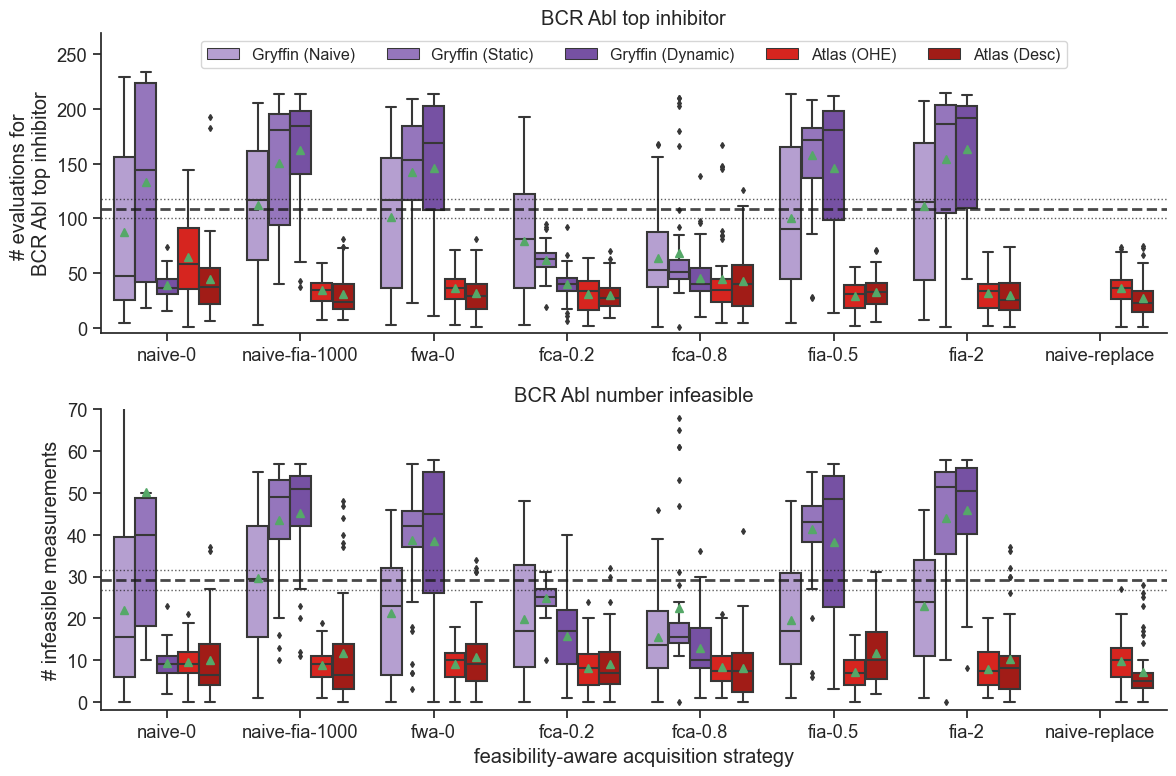

In [11]:
#--------------------------------------------
# [NUM EVALS + NUM_NANS] GRYFFIN VS. BOTORCH
#--------------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']


#-----------
# NUM EVALS 
#-----------
# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=axes[0], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = axes[0].get_legend_handles_labels()

print(handles)

axes[0].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

axes[0].set_ylim(-5, 270)

axes[0].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[0].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[0].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[0].legend(loc='upper center', ncol=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('# evaluations for \nBCR Abl top inhibitor')
axes[0].set_title('BCR Abl top inhibitor')
#axes[0].set_yscale('log')
axes[0].spines.right.set_visible(False)
axes[0].spines.top.set_visible(False)

#-----------
# NUM NANS
#-----------
# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=axes[1], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

axes[1].set_ylim(-2, 70)

axes[1].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[1].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[1].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[1].legend(loc='upper center', ncol=3)
axes[1].set_xlabel('feasibility-aware acquisition strategy')
axes[1].set_ylabel('# infeasible measurements')
axes[1].set_title('BCR Abl number infeasible')
#ax.set_yscale('log')
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)

axes[1].legend([],[], frameon=False)


plt.tight_layout()
plt.savefig('kinase_num_eval_num_nan.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x7fe11c9e7ac0>, <matplotlib.patches.Rectangle object at 0x7fe11c9ec580>, <matplotlib.patches.Rectangle object at 0x7fe11cbe95e0>, <matplotlib.patches.Rectangle object at 0x7fe11cbe95b0>, <matplotlib.patches.Rectangle object at 0x7fe11cbeb520>]


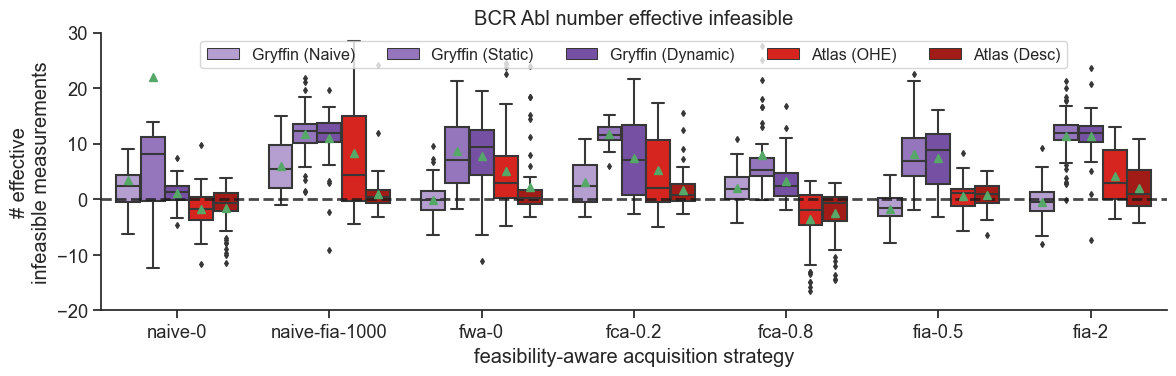

In [27]:
#------------------------------------
# [NUM NANS EFF] GRYFFIN VS. BOTORCH
#------------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans_eff'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans_eff'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='desc-pca')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans_eff', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-20, 30)

ax.axhline(0.0, lw=2, ls='--', c='k', alpha=0.8)
# ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# effective\ninfeasible measurements')
ax.set_title('BCR Abl number effective infeasible')
#ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()

[<BarContainer object of 8 artists>, <BarContainer object of 8 artists>]
[<BarContainer object of 8 artists>, <BarContainer object of 8 artists>]


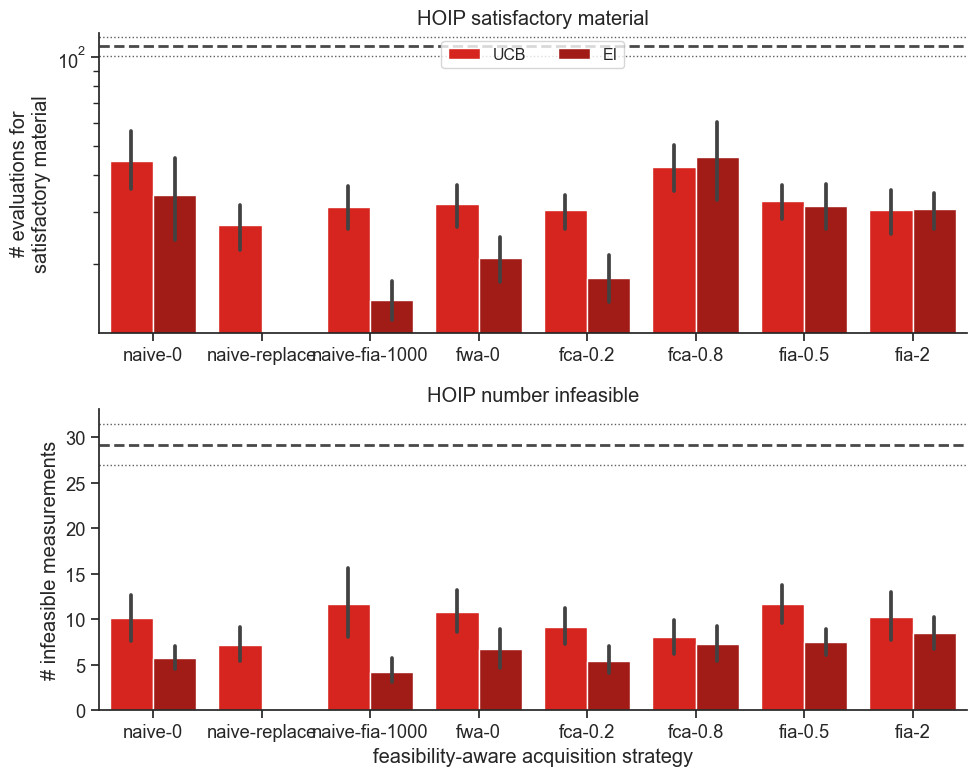

In [23]:
#-----------
# UCB vs EI
#-----------

#-------------------------------------------
# [NUM EVALS, NUM NANS] BOTORCH
#-------------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

pal = ['#F50800', '#B80600']


#-----------
# NUM EVALS
#-----------

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['planner']=='gryffin')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='wodesc')
        ]

labels = ['UCB', 'EI']


# v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='acqf', 
#                      showmeans=True, ax=axes[0], linewidth=1.5,  palette=pal, saturation=0.75,
#                     fliersize=3.)
b_ = sns.barplot(data=data, x='params', y='num_evals', hue='acqf', palette=pal, ax=axes[0])

handles, _ = axes[0].get_legend_handles_labels()

print(handles)

axes[0].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

axes[0].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[0].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[0].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[0].legend(loc='upper center', ncol=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('# evaluations for\nsatisfactory material')
axes[0].set_title('HOIP satisfactory material')
axes[0].spines.right.set_visible(False)
axes[0].spines.top.set_visible(False)

#-----------
# NUM NANS
#-----------

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_top_1[
        ~(df_top_1['planner']=='random')&\
        ~(df_top_1['planner']=='gryffin')&\
        ~(df_top_1['params']=='fca-0.5')&\
        ~(df_top_1['params']=='fia-1')&\
        ~(df_top_1['desc']=='wodesc')
    ]

labels = ['UCB', 'EI']


# v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='acqf', 
#                      showmeans=True, ax=axes[1], linewidth=1.5,  palette=pal, saturation=0.75,
#                     fliersize=3.)

b_ = sns.barplot(data=data, x='params', y='num_nans', hue='acqf', palette=pal, ax=axes[1])

handles, _ = axes[1].get_legend_handles_labels()

print(handles)

axes[1].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)


axes[1].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[1].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[1].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[1].legend(loc='upper center', ncol=3)
axes[1].set_xlabel('feasibility-aware acquisition strategy')
axes[1].set_ylabel('# infeasible measurements')
axes[1].set_title('HOIP number infeasible')
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)

axes[1].legend([],[], frameon=False)

plt.tight_layout()

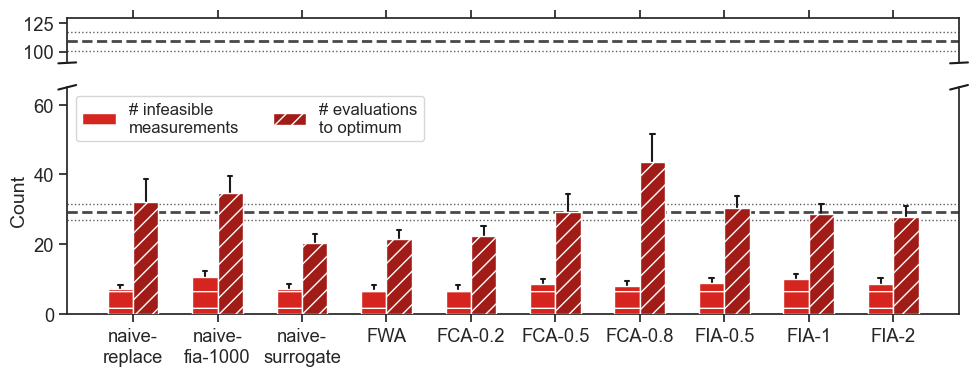

In [18]:
#---------------------------------------
# COMBINED NUM EVAL + NUM NANS BARCHART
#---------------------------------------

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), gridspec_kw={'height_ratios': [1, 5]})

pal = ['#F50800', '#B80600']


# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

random_mean_num_nans = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_nans = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

# duplicate dataset for plotting purposes only

df_tmp_nan = df_top_1.copy()
df_tmp_eval = df_top_1.copy()

df_tmp_nan['type_'] = 'nans'
df_tmp_nan['metric'] = df_tmp_nan['num_nans']
df_tmp_eval['type_'] = 'eval'
df_tmp_eval['metric'] = df_tmp_eval['num_evals']

df_plot = pd.concat((df_tmp_nan, df_tmp_eval))

data = df_plot[
        ~(df_plot['planner']=='random')&\
        ~(df_plot['planner']=='gryffin')&\
        #~(df_plot['params']=='fca-0.5')&\
        #~(df_plot['params']=='fia-1')&\
        ~(df_plot['desc']=='wodesc')&\
        ~(df_plot['acqf']=='ucb')
    ]

labels = ['# infeasible\nmeasurements', '# evaluations\nto optimum']

break_ = sns.barplot(
        data=data, x='params', y='metric', hue='type_', palette=pal, ax=ax1,
        capsize=0.05, errwidth=1.5, errcolor='k',  width=0.6, zorder=3)

b_ = sns.barplot(
        data=data, x='params', y='metric', hue='type_', palette=pal, ax=ax2,
        capsize=0.05, errwidth=1.5, errcolor='k',  width=0.6, zorder=3)
   
        
        

ax1.set_ylim(90., 130.)  # outliers only
ax2.set_ylim(0., 65.)  # most of the data

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.set_xlabel('')
ax1.set_ylabel('')


# random baseline num evals
ax1.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8, zorder=1)
ax1.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7, zorder=1)
ax1.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7, zorder=1)

# random baseline num nans
ax2.axhline(random_mean_num_nans, lw=2, ls='--', c='k', alpha=0.8, zorder=1)
ax2.axhline(random_mean_num_nans+1.96*random_stderr_num_nans, lw=1, ls=':', c='k', alpha=0.7, zorder=1)
ax2.axhline(random_mean_num_nans-1.96*random_stderr_num_nans, lw=1, ls=':', c='k', alpha=0.7, zorder=1)


ax2.set_ylabel('')
ax2.set_xlabel('')


d = .010  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax2.set_ylabel('Count', fontsize=14)

# add hatches 
num_locations = len(data['params'].unique())
#hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
hatches = itertools.cycle(['-', '//'])
for i, bar in enumerate(ax2.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
    
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper left', ncol=2,fontsize=12)
ax1.get_legend().remove()

labels = [
    'naive-\nreplace', 'naive-\nfia-1000', 'naive-\nsurrogate',
    'FWA', 
    'FCA-0.2', 'FCA-0.5', 'FCA-0.8',
    'FIA-0.5', 'FIA-1', 'FIA-2',
]
ax2.set_xticklabels(labels)


plt.tight_layout()

# TODO: remove the top axis ticks (or axis all tohgetehr), make the y-axis tick labels the same size
# add labels for random sampling baselines in affinity designer 

40.39074074074073 26.669549615455544


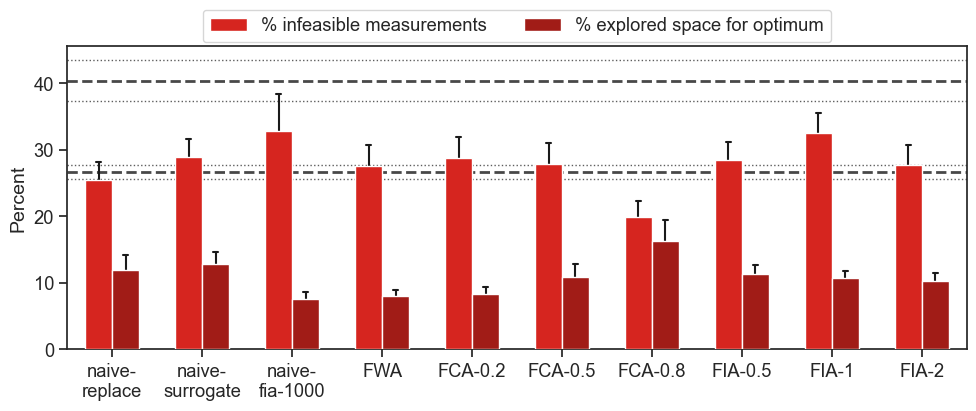

In [34]:
#---------------------------------------
# COMBINED PER EXPLORE + PER NANS BARCHART
#---------------------------------------

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

pal = ['#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['per_explore'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['per_explore'].std() / np.sqrt(200)

random_mean_num_nans = df_top_1[df_top_1['planner']=='random']['per_nans'].mean()
random_stderr_num_nans = df_top_1[df_top_1['planner']=='random']['per_nans'].std() / np.sqrt(200)

# duplicate dataset for plotting purposes only

df_tmp_nan = df_top_1.copy()
df_tmp_eval = df_top_1.copy()

df_tmp_nan['type_'] = 'nans'
df_tmp_nan['metric'] = df_tmp_nan['per_nans']
df_tmp_eval['type_'] = 'eval'
df_tmp_eval['metric'] = df_tmp_eval['per_explore']

df_plot = pd.concat((df_tmp_nan, df_tmp_eval))

data = df_plot[
        ~(df_plot['planner']=='random')&\
        ~(df_plot['planner']=='gryffin')&\
        #~(df_plot['params']=='fca-0.5')&\
        #~(df_plot['params']=='fia-1')&\
        ~(df_plot['desc']=='wodesc')&\
        ~(df_plot['acqf']=='ucb')
    ]



b_ = sns.barplot(
        data=data, x='params', y='metric', hue='type_', palette=pal, ax=ax,
        capsize=0.05, errwidth=1.5, errcolor='k',  width=0.6, zorder=3)
   
        
print(random_mean_num_evals, random_mean_num_nans)

# random baseline num evals
ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8, zorder=1)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7, zorder=1)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7, zorder=1)

# random baseline num nans
ax.axhline(random_mean_num_nans, lw=2, ls='--', c='k', alpha=0.8, zorder=1)
ax.axhline(random_mean_num_nans+1.96*random_stderr_num_nans, lw=1, ls=':', c='k', alpha=0.7, zorder=1)
ax.axhline(random_mean_num_nans-1.96*random_stderr_num_nans, lw=1, ls=':', c='k', alpha=0.7, zorder=1)

ax.set_ylabel('')
ax.set_xlabel('')


ax.set_ylabel('Percent', fontsize=14)

# add hatches 
num_locations = len(data['params'].unique())
#hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
hatches = itertools.cycle(['-', '//'])
for i, bar in enumerate(ax2.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
    



labels = [
    'naive-\nreplace','naive-\nsurrogate', 'naive-\nfia-1000', 
    'FWA', 
    'FCA-0.2', 'FCA-0.5', 'FCA-0.8',
    'FIA-0.5', 'FIA-1', 'FIA-2',
]
ax.set_xticklabels(labels)

leg_labels = ['% infeasible measurements', '% explored space for optimum']
box = ax.get_position()
handles, _ = ax.get_legend_handles_labels()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(handles, leg_labels, loc='upper center',  bbox_to_anchor=(0.5, 1.15),
          fancybox=True, shadow=False, ncol=2)


plt.tight_layout()

plt.savefig('kinase_single_obj_percent.png', dpi=300)

# TODO: remove the top axis ticks (or axis all tohgetehr), make the y-axis tick labels the same size
# add labels for random sampling baselines in affinity designer 

109.055 29.185


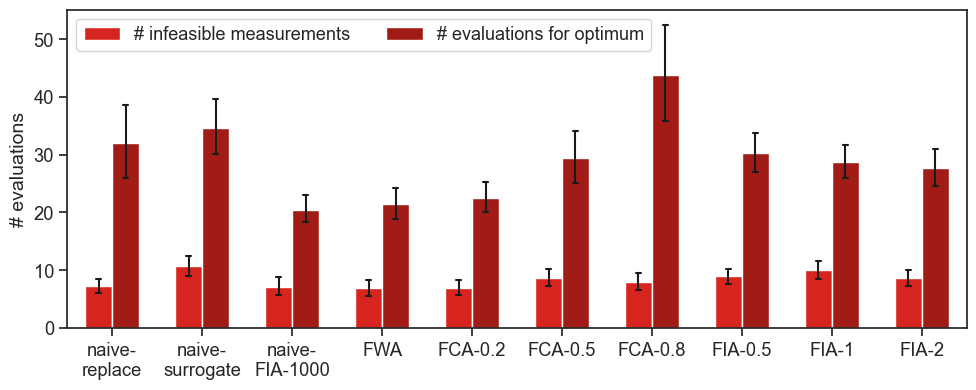

In [42]:
#---------------------------------------
# COMBINED PER EXPLORE + PER NANS BARCHART
#---------------------------------------

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

pal = ['#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_top_1[df_top_1['planner']=='random']['num_evals'].std() / np.sqrt(200)

random_mean_num_nans = df_top_1[df_top_1['planner']=='random']['num_nans'].mean()
random_stderr_num_nans = df_top_1[df_top_1['planner']=='random']['num_nans'].std() / np.sqrt(200)

# duplicate dataset for plotting purposes only

df_tmp_nan = df_top_1.copy()
df_tmp_eval = df_top_1.copy()

df_tmp_nan['type_'] = 'nans'
df_tmp_nan['metric'] = df_tmp_nan['num_nans']
df_tmp_eval['type_'] = 'eval'
df_tmp_eval['metric'] = df_tmp_eval['num_evals']

df_plot = pd.concat((df_tmp_nan, df_tmp_eval))

data = df_plot[
        ~(df_plot['planner']=='random')&\
        ~(df_plot['planner']=='gryffin')&\
        #~(df_plot['params']=='fca-0.5')&\
        #~(df_plot['params']=='fia-1')&\
        ~(df_plot['desc']=='wodesc')&\
        ~(df_plot['acqf']=='ucb')
    ]



b_ = sns.barplot(
        data=data, x='params', y='metric', hue='type_', palette=pal, ax=ax,
        capsize=0.05, errwidth=1.5, errcolor='k',  width=0.6, zorder=2)
   
        
print(random_mean_num_evals, random_mean_num_nans)

# random baseline num evals
# ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8, zorder=1)
# ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7, zorder=1)
# ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7, zorder=1)

# # random baseline num nans
# ax.axhline(random_mean_num_nans, lw=2, ls='--', c='k', alpha=0.8, zorder=1)
# ax.axhline(random_mean_num_nans+1.96*random_stderr_num_nans, lw=1, ls=':', c='k', alpha=0.7, zorder=1)
# ax.axhline(random_mean_num_nans-1.96*random_stderr_num_nans, lw=1, ls=':', c='k', alpha=0.7, zorder=1)

ax.set_ylabel('')
ax.set_xlabel('')


ax.set_ylabel('# evaluations', fontsize=14)

# add hatches 
num_locations = len(data['params'].unique())
#hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
hatches = itertools.cycle(['-', '//'])
for i, bar in enumerate(ax2.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
    



labels = [
    'naive-\nreplace','naive-\nsurrogate', 'naive-\nFIA-1000', 
    'FWA', 
    'FCA-0.2', 'FCA-0.5', 'FCA-0.8',
    'FIA-0.5', 'FIA-1', 'FIA-2',
]
ax.set_xticklabels(labels)

leg_labels = ['# infeasible measurements', '# evaluations for optimum']
box = ax.get_position()
handles, _ = ax.get_legend_handles_labels()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(handles, leg_labels, loc='upper center',  bbox_to_anchor=(0.5, 1.15),
#           fancybox=True, shadow=False, ncol=2)

ax.legend(handles, leg_labels, loc='upper left', ncol=2, fontsize=13)


plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('kinase_num_evals_num_nans.png', dpi=300)


In [25]:
random_stderr_num_evals 

4.269355555502081

In [45]:
data

,method,planner,params,desc,acqf,num_evals,num_nans,num_nans_eff,type_,metric
1650,desc-mord-botorch-naive-0,botorch,naive-0,desc-mord,ei,10,5,2.888889,nans,5
1651,desc-mord-botorch-naive-0,botorch,naive-0,desc-mord,ei,24,3,-2.066667,nans,3
1652,desc-mord-botorch-naive-0,botorch,naive-0,desc-mord,ei,24,4,-1.066667,nans,4
1653,desc-mord-botorch-naive-0,botorch,naive-0,desc-mord,ei,14,1,-1.955556,nans,1
1654,desc-mord-botorch-naive-0,botorch,naive-0,desc-mord,ei,19,3,-1.011111,nans,3
...,...,...,...,...,...,...,...,...,...,...
1995,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,13,3,0.255556,eval,13
1996,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,37,10,2.188889,eval,37
1997,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,39,19,10.766667,eval,39
1998,desc-mord-botorch-fia-2,botorch,fia-2,desc-mord,ei,25,2,-3.277778,eval,25


In [8]:
def get_pvalues(
        data, 
        metric, # 'botorch':['wodesc', 'desc']
        strategies={
                'random':['False'], 
                'botorch':['wodesc', 'desc-mord'],  
#                 'gryffin':['naive', 'static', 'dynamic']
        },
        constraints=['naive-0', 'naive-replace', 'naive-fia-1000', 'fwa-0', 
                     'fca-0.2', 'fca-0.5', 'fca-0.8', 
                     'fia-0.5', 'fia-1', 'fia-2'],
    ):
    res = {'planner':[],'desc':[],'params':[], 'metric': []}
    gb = data.groupby(by=['planner', 'desc', 'params'])
    # random first
    #random = data[(data['planner']=='random')&(data['desc']==False)&(data['param']=='random')][metric].to_numpy()
    group = gb.get_group(('random', False, 'random'))
    mean = group.mean()[metric]
    
    res['planner'].append('random')
    res['desc'].append(False)
    res['params'].append('random')
    res['metric'].append(mean)
    
    for alg in ['botorch']: #'gryffin']:
        for desc in strategies[alg]:
            for param in constraints:
                group = gb.get_group((alg, desc, param))
                mean = group.mean()[metric]
                res['planner'].append(alg)
                res['desc'].append(desc)
                res['params'].append(param)
                res['metric'].append(mean)
                
    df = pd.DataFrame(res).sort_values(by='metric', ascending=True)
    
    signif = []
    
    best = df.iloc[0, :][['planner', 'desc', 'params']].tolist()
    best_res = data[
            (data['planner']==best[0])&\
            (data['desc']==best[1])&\
            (data['params']==best[2])][metric].to_numpy()
    
    print('BEST : ', '-'.join(best))
    signif.append(best)
    
    stop = False
    idx=1
    while not stop:
        
        new = df.iloc[idx, :][['planner', 'desc', 'params']].tolist()
        new_res = data[
            (data['planner']==new[0])&\
            (data['desc']==new[1])&\
            (data['params']==new[2])][metric].to_numpy()
        
        _, pval = stats.ttest_ind(best_res, new_res, equal_var=False)
        
        print('NEW : ', '-'.join(new))
        print(pval)
        if pval<0.05:
            stop=True
        else:
            signif.append(new)
            idx+=1
        
    return signif

In [9]:
def make_table(
    data,
    filename='mytable.txt',
    metric='num_evals_after',
    signif=[['dummy', 'dummy', 'dummy']], 
    strategies={
            'random':['False'], 
                'botorch':['wodesc', 'desc-mord'],  
#                 'gryffin':['naive', 'static', 'dynamic']
    },
    constraints=['naive-0', 'naive-replace', 'naive-fia-1000', 'fwa-0', 
                 'fca-0.2', 'fca-0.5', 'fca-0.8', 
                 'fia-0.5', 'fia-1', 'fia-2'],
    num_dec=1,
):
    ''' generate a latex table with the optimization experiment results
    '''
    gb = data.groupby(by=['planner', 'desc', 'params'])
    
    num_cols = len(constraints)+1 # plus one for planner col
    num_rows = np.sum([len(val) for key, val in strategies.items()])-1 # minus 1 for random sampling
    
    col_headers = ['planner']+constraints
    
    col_str = ' '.join(['c' for _ in range(num_cols)])
    f = ''
    
    # table header
    f+='\\begin{table}[!ht]\n\centering\n\caption{\ldots}\n\label{\ldots}\n\\begin{tabular}{'+col_str+'}\n'
    f+= '\\toprule\n'
    f+= ' & '.join([header for header in col_headers]) + '\\\ \n'
    f+= '\midrule\n'
    
    # random sampling first
    f+='random & '
    group = gb.get_group(('random', False, 'random'))
    mean, sem = group.mean()[metric], group.sem()[metric]
    f += f'{round(mean,num_dec)} $\pm$ {round(sem,num_dec)} & '
    to_add = ''.join([f'$-$ & ' for _ in range(num_cols-3)])
    f+= to_add 
    f+= '$-$ \\\ \n'
    
    for alg in ['botorch']: #'gryffin']:
        for desc in strategies[alg]:
            f += f'{alg}-{desc} & '
            for param in constraints:
                group = gb.get_group((alg, desc, param))
                mean, sem = group.mean()[metric], group.sem()[metric]

                if not [alg, desc, param] in signif:
                    if param == constraints[-1]:
                        f += f'${round(mean,num_dec)} \pm {round(sem,num_dec)}$ \\\ \n'
                    else:
                        f += f'${round(mean,num_dec)} \pm {round(sem,num_dec)}$ &'
                else:
                    if param == constraints[-1]:
                        f+='$\\bm{'
                        f += f'{round(mean,num_dec)} \pm {round(sem,num_dec)}'
                        f+= '}$ \\\ \n'
                    else:
                        f+='$\\bm{'
                        f += f'{round(mean,num_dec)} \pm {round(sem,num_dec)}'
                        f+= '}$ & '

    # end of table
    f+='\\bottomrule\n'
    f+='\end{tabular}\n'
    f+='\end{table}\n'

    # write table to file
    with open(filename, 'w') as file:
        file.write(f)
    
 

In [10]:
df_tab = df_top_1[~(df_top_1['acqf']=='ucb')]

signif = get_pvalues(df_tab, 'num_evals')
make_table(df_tab, filename='kinase_num_evals.txt', metric='num_evals', signif=signif)

BEST :  botorch-desc-mord-naive-fia-1000
NEW :  botorch-desc-mord-fwa-0
0.5290198966645594
NEW :  botorch-desc-mord-fca-0.2
0.27299680545960436
NEW :  botorch-desc-mord-fia-2
0.0003797444029829205


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/4235579416.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition,

In [11]:
df_tab = df_top_1[~(df_top_1['acqf']=='ucb')]

signif = get_pvalues(df_tab, 'per_explore')
make_table(df_tab, filename='kinase_per_explore.txt', metric='per_explore', signif=signif)

BEST :  botorch-desc-mord-naive-fia-1000
NEW :  botorch-desc-mord-fwa-0
0.5290198966645574
NEW :  botorch-desc-mord-fca-0.2
0.2729968054596042
NEW :  botorch-desc-mord-fia-2
0.000379744402982924


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/4235579416.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition,

In [12]:
df_tab = df_top_1[~(df_top_1['acqf']=='ucb')]

signif = get_pvalues(df_tab, 'per_nans')
make_table(df_tab, filename='kinase_per_nans.txt', metric='per_nans', signif=signif)

BEST :  botorch-wodesc-naive-0
NEW :  botorch-desc-mord-fca-0.8
0.002451983406869931


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/4235579416.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition,

In [13]:
signif = get_pvalues(df_tab, 'num_nans')
make_table(df_tab, filename='kinase_num_nans.txt', metric='num_nans', signif=signif)

BEST :  botorch-desc-mord-fca-0.2
NEW :  botorch-desc-mord-fwa-0
0.9459034126316032
NEW :  botorch-desc-mord-naive-fia-1000
0.8354005067659351
NEW :  botorch-desc-mord-naive-0
0.7220483026950146
NEW :  botorch-wodesc-fia-0.5
0.6736923205356565
NEW :  botorch-wodesc-fia-2
0.34488106345386016
NEW :  botorch-wodesc-fia-1
0.2883084099113958
NEW :  botorch-wodesc-fca-0.5
0.2476573855208419
NEW :  botorch-desc-mord-fca-0.8
0.24085500467330107
NEW :  botorch-wodesc-fca-0.2
0.16671894588214445
NEW :  botorch-wodesc-fca-0.8
0.128604693688613
NEW :  botorch-desc-mord-fca-0.5
0.09930166790872727
NEW :  botorch-desc-mord-fia-2
0.08886651054620025
NEW :  botorch-wodesc-naive-fia-1000
0.03844210713823637


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/545426905.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_27345/4235579416.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition,